In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from netCDF4 import Dataset as netcdf_dataset
import matplotlib.colors as colors

In [5]:
file_location = '/home/addison/Documents/School/Utrecht/LateralTransportProject/TransportR/'
# uk_dataset = pd.read_csv(file_location+"uk37_all_results.csv")
uk_annual = pd.read_csv(file_location+"uk37_ann_nemo_to_plot.csv")
uk_winter = pd.read_csv(file_location+"uk37_nov_may_nemo_to_plot.csv")
# tex_dataset = pd.read_csv(file_location+"tex86_all_results.csv")
tex_annual = pd.read_csv(file_location+"tex86_ann_nemo_to_plot.csv")
# tex_winter = pd.read_csv(file_location+"tex86_winter_to_plot.csv")
# tex_summer = pd.read_csv(file_location+"tex86_summ_to_plot.csv")

In [3]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [4]:
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

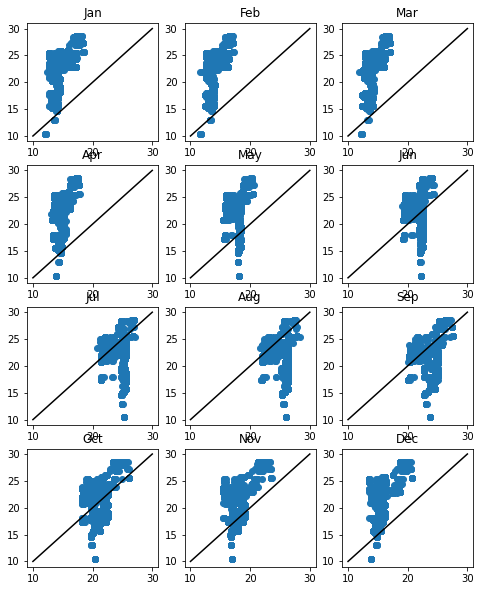

In [15]:
figure_location = '/home/addison/Documents/School/Utrecht/LateralTransportProject/figures/'

fig, axs = plt.subplots(nrows= 4, ncols=3,figsize = (8,10))
axis_num = 0
month_label = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

for ax in axs.flatten():
    # lower case month
    mon = month_label[axis_num].lower()
    
    ax.scatter(tex_dataset[mon],tex_dataset["tex86_sst"])
    
    ax.plot([10,30],[10,30],color = 'k')
    
    ax.title.set_text(month_label[axis_num])
    
    axis_num += 1

plt.tight_layout

plt.savefig(figure_location + "tex86sst vs monthly climatology mean sst.svg")

In [20]:
def create_mapfigure(dataset, filename, proxy_name, plot_title):

    figure_location = '/home/addison/Documents/School/Utrecht/LateralTransportProject/figures/'

    speeds = ["Sp_6","Sp_12","Sp_25","Sp_50","Sp_100","Sp_250","Sp_500"]

    fig, axs = plt.subplots(nrows = 8, ncols = 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize = [10,25])

    temp_min = -3.
    temp_max = 3.
    mid_val = 0.

    ax = axs[0]
    ax.scatter(dataset["Longitude"],dataset["Latitude"],\
                transform=ccrs.PlateCarree(), \
                c = dataset["proxy_offset_site_deep"], \
                cmap = 'coolwarm',\
                clim=(temp_min, temp_max), \
                norm=MidpointNormalize(midpoint=mid_val,\
                                       vmin=temp_min, vmax=temp_max)\
                )
    ax.title.set_text(proxy_name + " - SST")
    ax.set_extent([-8,38,30,46])
    # ax.title.set_text(month_label[axis_num-1])
    ax.coastlines()
    #ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)

    ax_num = 1

    for sp in speeds:
        ax = axs[ax_num]
        ax.scatter(dataset["Longitude"],dataset["Latitude"],\
                transform=ccrs.PlateCarree(), \
                c = dataset["offset_ann_deep_"+sp], \
                cmap = 'coolwarm',\
                clim=(temp_min, temp_max), \
                norm=MidpointNormalize(midpoint=mid_val,\
                                       vmin=temp_min, vmax=temp_max)\
                )
        ax.set_extent([-8,38,30,46])
        ax.title.set_text(sp+" - SST")
        # ax.title.set_text(month_label[axis_num-1])
        ax.coastlines()
        #ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
        ax_num += 1

#     fig.colorbar(im, ax=axs.ravel().tolist(), orientation = "horizontal")
    fig.suptitle(plot_title)
    # fig.tight_layout()
    plt.savefig(figure_location+filename+'.svg')


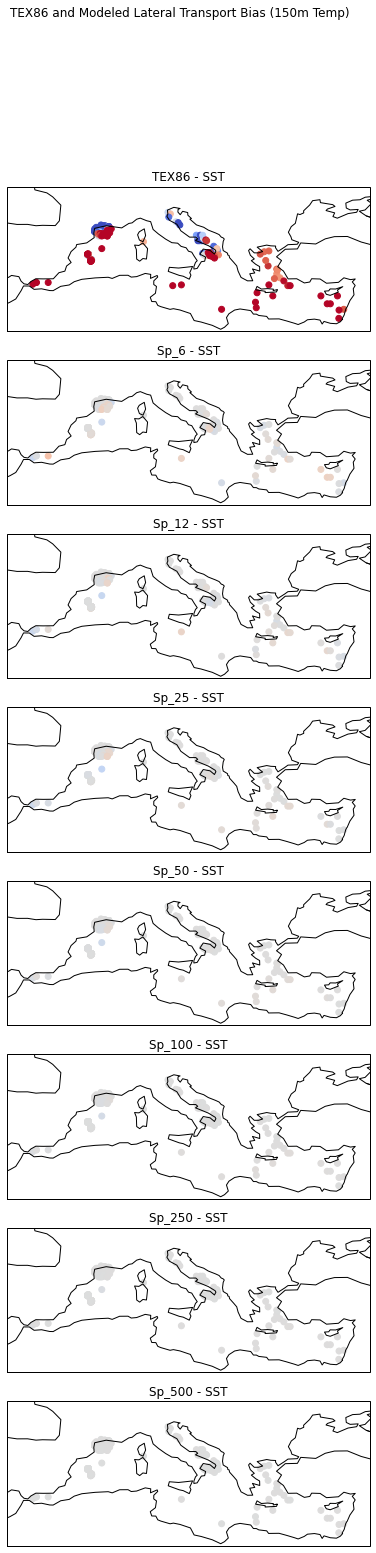

In [22]:
# create_mapfigure(uk_annual, "UK37_annual","UK37","UK37 and Modeled Lateral Transport Bias (Mean Annual SST)")
# create_mapfigure(uk_winter, "UK37_winter","UK37","UK37 and Modeled Lateral Transport Bias (Nov-May) SST)")
# create_mapfigure(tex_annual, "TEX86_annual","TEX86","TEX86 and Modeled Lateral Transport Bias (Mean Annual SST)")
create_mapfigure(tex_annual, "TEX86_deep","TEX86","TEX86 and Modeled Lateral Transport Bias (150m Temp)")


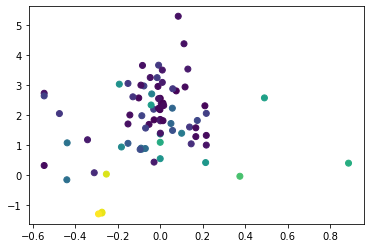

In [91]:
# Now let's plot the transport offset vs proxy offset for each dataset

plt.scatter(uk_winter['modeled_bias_Sp_6'],uk_winter['proxy_offset_site'], c = uk_winter['wdepth'])

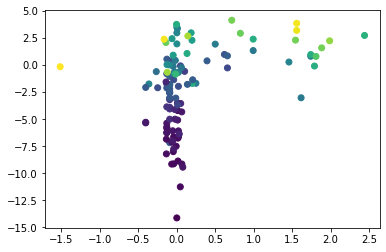

In [92]:
plt.scatter(tex_summer['modeled_bias_Sp_6'],tex_summer['proxy_offset_site'], c = tex_summer["site depth (m)"])

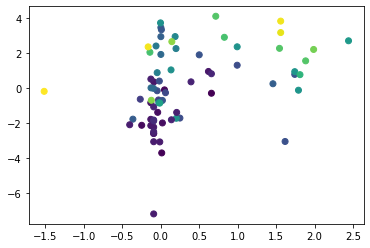

In [93]:
plt.scatter(tex_summer[tex_summer["site depth (m)"] > 500.]['modeled_bias_Sp_6'],tex_summer[tex_summer["site depth (m)"] > 1000.]['proxy_offset_site'], c = tex_summer[tex_summer["site depth (m)"] > 500.]["site depth (m)"])